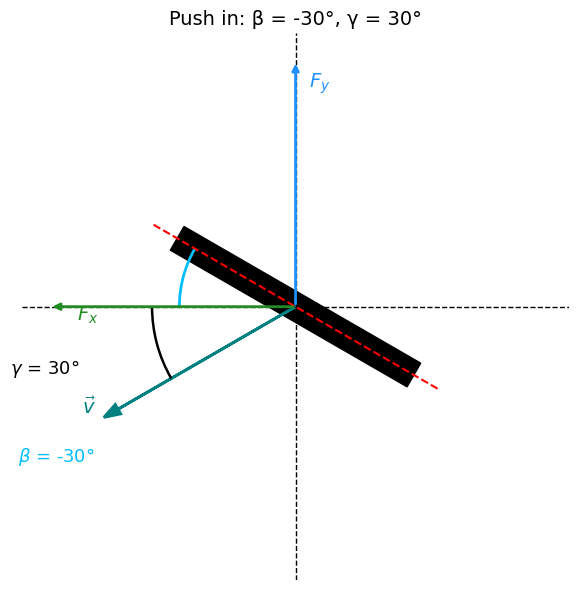

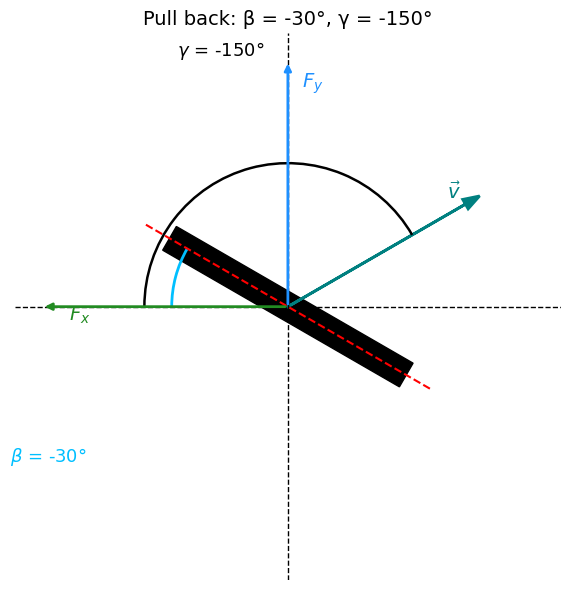

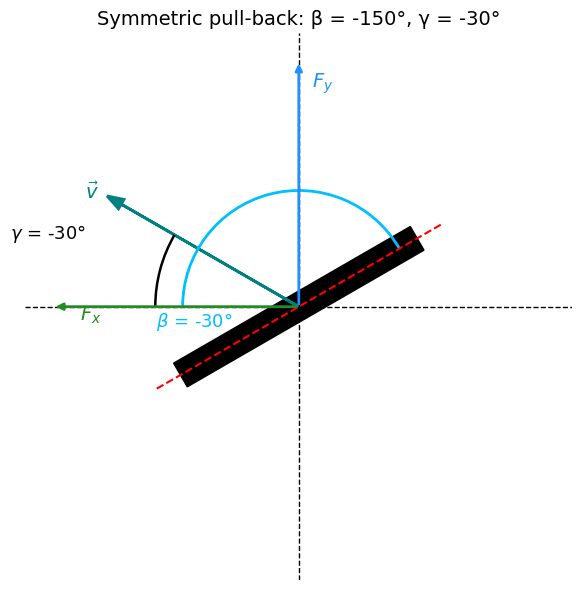

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def rotation_matrix(deg):
    rad = np.radians(deg)
    return np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])

def shortest_signed_angle(from_deg, to_deg):
    """Returns signed shortest angle from 'from_deg' to 'to_deg' in [-180, 180]"""
    delta = (to_deg - from_deg + 180) % 360 - 180
    return delta

def draw_diagram(beta, gamma, image_type):
    fig, ax = plt.subplots(figsize=(6,6))

    if image_type == 1:
        title = "Push in:"
        gamma_used = gamma
        beta_used = beta
        fx_sign = 1
        mirror_plate = False
        mirror_velocity = False

    elif image_type == 2:
        title = "Pull back:"
        gamma_used = (gamma + 180) % 360
        beta_used = beta
        fx_sign = 1
        mirror_plate = False
        mirror_velocity = False

    elif image_type == 3:
        title = "Symmetric pull-back:"
        gamma_used = (gamma + 180) % 360
        beta_used = beta
        fx_sign = 1
        mirror_plate = True
        mirror_velocity = True

    else:
        raise ValueError("Invalid image type")

    ax.plot([-2, 2], [0, 0], 'k--', lw=1)
    ax.plot([0, 0], [-2, 2], 'k--', lw=1)
    #ax.annotate('', xy=(1.8*fx_sign, 0), xytext=(0, 0),
                #arrowprops=dict(arrowstyle='-|>', color='forestgreen', lw=2))
    ax.annotate('', xy=(-1.8*fx_sign, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='-|>', color='forestgreen', lw=2))
    ax.annotate('', xy=(0, 1.8), xytext=(0, 0),
                arrowprops=dict(arrowstyle='-|>', color='dodgerblue', lw=2))
    ax.text(-1.6*fx_sign, -0.1, r'$F_x$', fontsize=14, color='forestgreen',
            ha='left' if fx_sign > 0 else 'right')
    ax.text(0.1, 1.6, r'$F_y$', fontsize=14, color='dodgerblue')

    plate_angle_global = (180 - beta_used) % 360
    R_plate = rotation_matrix(plate_angle_global)
    rect = np.array([[-1, -0.1], [1, -0.1], [1, 0.1], [-1, 0.1], [-1, -0.1]])
    plate_pts = (R_plate @ rect.T).T
    if mirror_plate:
        plate_pts[:, 0] *= -1
    ax.fill(plate_pts[:,0], plate_pts[:,1], color='black')

    centerline = np.array([[-1.2, 0], [1.2, 0]])
    centerline_rot = (R_plate @ centerline.T).T
    if mirror_plate:
        centerline_rot[:, 0] *= -1
    ax.plot(centerline_rot[:,0], centerline_rot[:,1], 'r--', lw=1.5)

    velocity_angle_global = (180 + gamma_used) % 360
    v_vec = rotation_matrix(velocity_angle_global) @ np.array([1.5, 0])
    if mirror_velocity:
        v_vec[0] *= -1
    ax.arrow(0, 0, v_vec[0], v_vec[1],
             head_width=0.08, head_length=0.12,
             fc='teal', ec='teal', lw=2)
    ax.text(v_vec[0]*1.05-0.2, v_vec[1]*1.05, r'$\vec{v}$', fontsize=14, color='teal')

    # --- β arc ---
    dx = centerline_rot[1, 0] - centerline_rot[0, 0]
    dy = centerline_rot[1, 1] - centerline_rot[0, 1]
    plate_angle_final = np.degrees(np.arctan2(dy, dx)) % 360
    beta_arc_angle = shortest_signed_angle(180, plate_angle_final)

    #start = 210
    #end = 180 
    start = 180
    end = 180 + beta_arc_angle
    if beta_arc_angle < 0:
        start, end = end, start
    arc_beta = Arc((0, 0), 1.7, 1.7,
                   theta1=start,
                   theta2=end,
                   color='deepskyblue', lw=2)
    ax.add_patch(arc_beta)

    label_beta = rotation_matrix(180 + beta_arc_angle / 2) @ np.array([1.4, 0])
    beta_label_text = fr'$\beta$ = -30°'  # Add explicit sign

    ax.text(label_beta[0]-0.4, label_beta[1]-1.5,
            beta_label_text,
            fontsize=13, color='deepskyblue', ha='center')

    # --- γ arc ---
    v_angle = np.degrees(np.arctan2(v_vec[1], v_vec[0])) % 360
    gamma_arc_angle = shortest_signed_angle(180, v_angle)

    start = 180
    end = 180 + gamma_arc_angle
    if gamma_arc_angle < 0:
        start, end = end, start
    arc_gamma = Arc((0, 0), 2.1, 2.1,
                    theta1=start,
                    theta2=end,
                    color='black', lw=1.8)
    ax.add_patch(arc_gamma)

    label_gamma = rotation_matrix(180 + gamma_arc_angle / 2) @ np.array([1.9, 0])
    ax.text(label_gamma[0], label_gamma[1],
            fr'$\gamma$ = {gamma_arc_angle:.0f}°',
            fontsize=13, color='black', ha='center')

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"{title} β = {beta_arc_angle:+.0f}°, γ = {gamma_arc_angle:.0f}°", fontsize=14)
    plt.tight_layout()
    plt.show()

beta_input = 30   # Anti-clockwise tilt negative
gamma_input = 30   # Velocity angle from vertical

draw_diagram(beta_input, gamma_input, image_type=1)
draw_diagram(beta_input, gamma_input, image_type=2)
draw_diagram(beta_input, gamma_input, image_type=3)
